In [68]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [69]:
income_data = pd.read_csv('/home/muhammed-shafeeh/AI_ML/Ai-and-Ml/data/ai_and_ml/income.csv')

In [70]:
income_data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


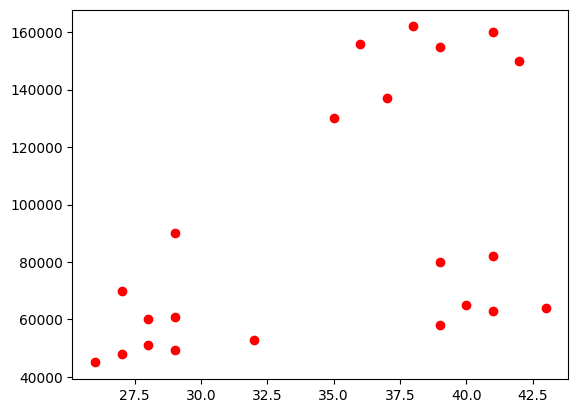

In [71]:
# plot the data age against income
plt.scatter(income_data['Age'], income_data['Income($)'], color = 'red')

In [72]:
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [73]:
y_pred = km.fit_predict(income_data[['Age', 'Income($)']])

In [74]:
income_data1 = income_data
income_data1['cluster'] = y_pred
income_data1.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


Text(0, 0.5, 'Income')

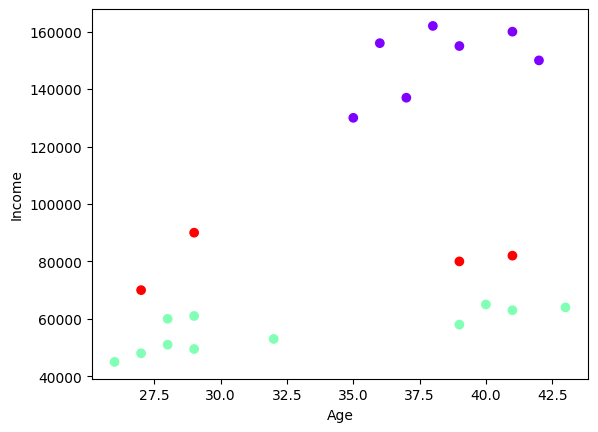

In [75]:
# scatter plot age income and cluster
plt.scatter(income_data1['Age'], income_data1['Income($)'], c = income_data1['cluster'], cmap = 'rainbow')
plt.xlabel('Age')
plt.ylabel('Income')




In [76]:
scaler = MinMaxScaler()
income_data[['Age', 'Income($)']] = scaler.fit_transform(income_data[['Age', 'Income($)']])
income_data.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [77]:
y_pred = km.fit_predict(income_data[['Age', 'Income($)']])

In [78]:
income_data2 = income_data
income_data2['cluster'] = y_pred
income_data.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [79]:
# find cenroids
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

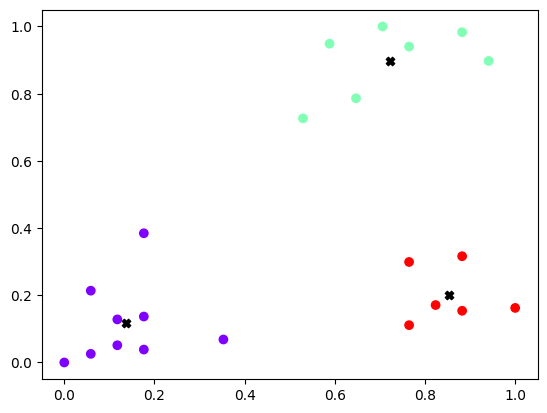

In [80]:
# scatter plot age income and cluster
plt.scatter(income_data2['Age'], income_data2['Income($)'], c = income_data2['cluster'], cmap = 'rainbow')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = 'black', marker = 'X')

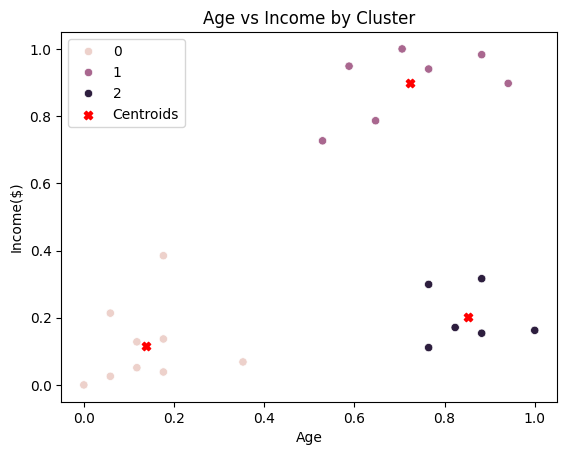

In [81]:
import seaborn as sns

sns.scatterplot(x='Age', y='Income($)', hue='cluster', data=income_data2)

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color = 'red', marker = 'X', label='Centroids')
plt.legend()
plt.title('Age vs Income by Cluster')


plt.show()